<a href="https://colab.research.google.com/github/Joabe18/varejista-de-bicicletas/blob/main/regressao_pi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas e datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
amostra = pd.read_csv('/content/drive/MyDrive/tabelasDrive/amostra_fato_ml_eua.csv')
customer = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimcustumer.csv')
product = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimproduct.csv')
specialoffer = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimspecialoffer.csv')
territory = pd.read_csv('/content/drive/MyDrive/tabelasDrive/dimterritory.csv')
plt.style.use('fivethirtyeight')

# Pré Processamento

## Retirando  colunas que não serão utilizadas

In [ ]:
amostra.head()

,sales_order_id,product_id,product_name,custumer_id,customer_marital_status,customer_gender,territory_id,territory_name,special_offer_id,special_offer_type,...,due_date,ship_date,status,delivery_days,subtotal,order_qty,unit_price,unit_price_discount,stratum,row_num
0,16632046,798,"Road-550-W Yellow, 40",286,S,F,9,Australia,1,No Discount,...,2014-02-04,2014-01-30,entregue no prazo,7,764.28,1,742.35,0.0,1,1
1,14500942,786,"Mountain-300 Black, 40",286,S,F,9,Australia,1,No Discount,...,2013-07-25,2013-07-20,entregue no prazo,7,66.97,1,3.99,0.0,1,2
2,34884712,901,"LL Touring Frame - Yellow, 54",286,S,F,9,Australia,1,No Discount,...,2013-11-08,2013-11-03,entregue no prazo,7,1237.82,1,4.99,0.0,1,3
3,13589640,781,"Mountain-200 Silver, 46",286,S,F,9,Australia,1,No Discount,...,2013-11-18,2013-11-13,entregue no prazo,7,588.96,1,8.99,0.0,1,4
4,15568330,792,"Road-250 Red, 58",286,S,F,9,Australia,1,No Discount,...,2013-07-22,2013-07-17,entregue no prazo,7,69.97,1,4.99,0.0,1,5


In [ ]:
amostra.dtypes

sales_order_id               int64
product_id                   int64
product_name                object
custumer_id                  int64
customer_marital_status     object
customer_gender             object
territory_id                 int64
territory_name              object
special_offer_id             int64
special_offer_type          object
special_offer_category      object
sales_order_ak              object
order_date                  object
due_date                    object
ship_date                   object
status                      object
delivery_days                int64
subtotal                   float64
order_qty                    int64
unit_price                 float64
unit_price_discount        float64
stratum                      int64
row_num                      int64
dtype: object

In [ ]:
df_amostra = amostra.drop(['sales_order_id', 'product_id','product_name','custumer_id', 'customer_marital_status','customer_gender','territory_id','territory_name','special_offer_id','special_offer_type','special_offer_category','sales_order_ak','order_date','due_date','ship_date','status', 'stratum', 'row_num'], axis=1)

In [ ]:
df_amostra.head()

,delivery_days,subtotal,order_qty,unit_price,unit_price_discount
0,7,764.28,1,742.35,0.0
1,7,66.97,1,3.99,0.0
2,7,1237.82,1,4.99,0.0
3,7,588.96,1,8.99,0.0
4,7,69.97,1,4.99,0.0


In [ ]:
df_amostra = df_amostra.reindex(columns=['unit_price', 'order_qty','unit_price_discount','delivery_days','subtotal'])
df_amostra.head()

In [ ]:
df_amostra.shape

(18490, 5)

In [ ]:
df_amostra.describe()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
count,18490.000000,18490.000000,18490.000000,18490.000000,18490.000000
mean,427.354524,2.144294,0.000196,7.000216,20053.581983
std,741.179661,2.097765,0.003262,0.014707,28297.045972
min,1.370000,1.000000,0.000000,7.000000,2.290000
25%,20.190000,1.000000,0.000000,7.000000,123.980000
50%,38.100000,1.000000,0.000000,7.000000,2418.050000
75%,539.990000,3.000000,0.000000,7.000000,36234.340000
max,3578.270000,27.000000,0.200000,8.000000,163930.390000


In [ ]:
import plotly.express as px

In [ ]:
# boxplot = px.box(df_amostra, y="unit_price")
# boxplot.show()

In [ ]:
# boxplot = px.box(df_amostra, y="order_qty")
# boxplot.show()

In [ ]:
# boxplot = px.box(df_amostra, y="subtotal")
# boxplot.show()

In [ ]:
# boxplot = px.box(df_amostra, y="unit_price_discount")
# boxplot.show()


In [ ]:
# boxplot = px.box(df_amostra, y="delivery_days")
# boxplot.show()

In [ ]:
import matplotlib.pyplot as plt

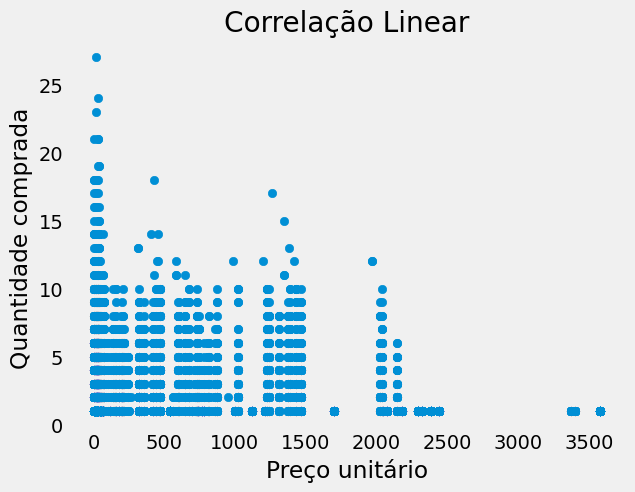

In [ ]:
plt.scatter(df_amostra.unit_price,df_amostra.order_qty)
plt.title('Correlação Linear')
plt.xlabel('Preço unitário')
plt.ylabel('Quantidade comprada ')
plt.grid(False)

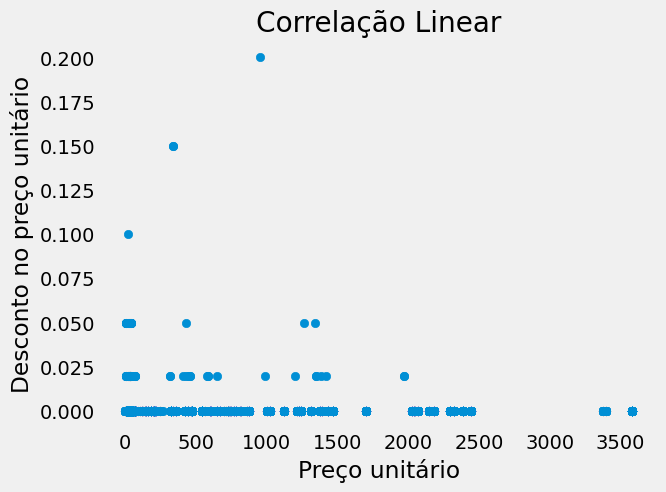

In [ ]:
plt.scatter( df_amostra.unit_price,df_amostra.unit_price_discount)
plt.title('Correlação Linear')
plt.xlabel('Preço unitário')
plt.ylabel('Desconto no preço unitário')
plt.grid(False)

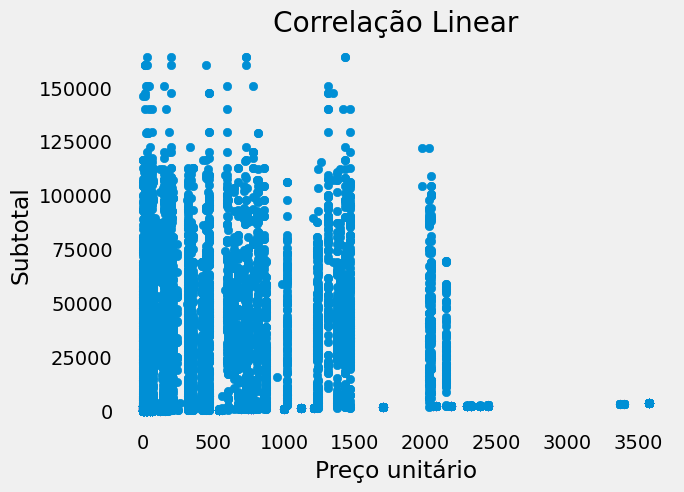

In [ ]:
plt.scatter(df_amostra.unit_price,df_amostra.subtotal)
plt.title('Correlação Linear')
plt.xlabel('Preço unitário')
plt.ylabel('Subtotal')
plt.grid(False)

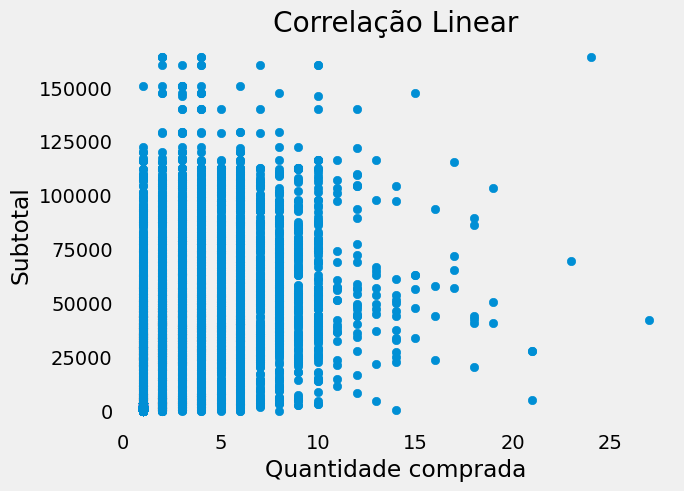

In [ ]:
plt.scatter(df_amostra.order_qty,df_amostra.subtotal)
plt.title('Correlação Linear')
plt.xlabel('Quantidade comprada')
plt.ylabel('Subtotal')
plt.grid(False)

In [ ]:
import seaborn as sns

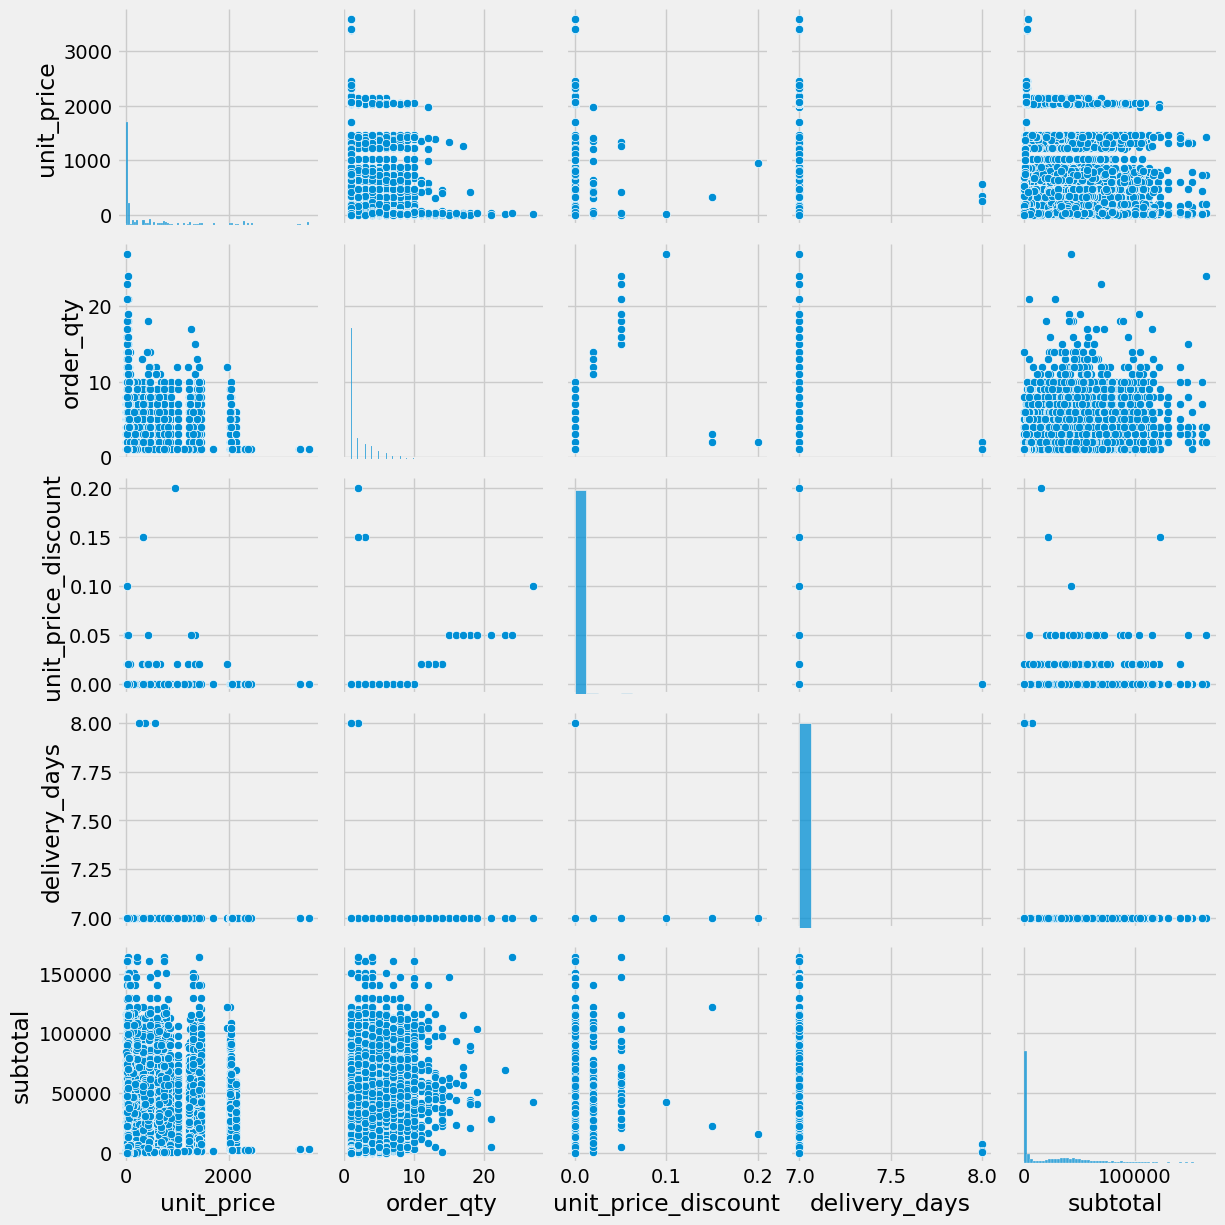

In [ ]:
sns.pairplot(df_amostra);

In [ ]:
import scipy.stats as stats

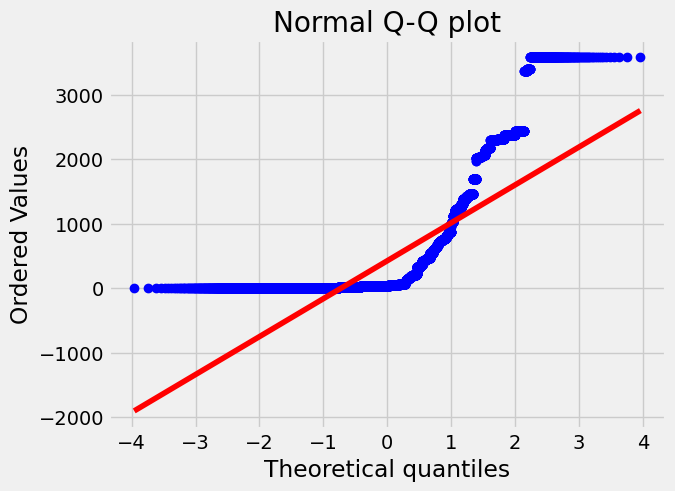

In [ ]:
stats.probplot(df_amostra['unit_price'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
hist =  px.histogram (df_amostra,  x = "unit_price", nbins=60)
hist.update_layout(width=800,height=500,title_text='Preço unitário')
hist.show()

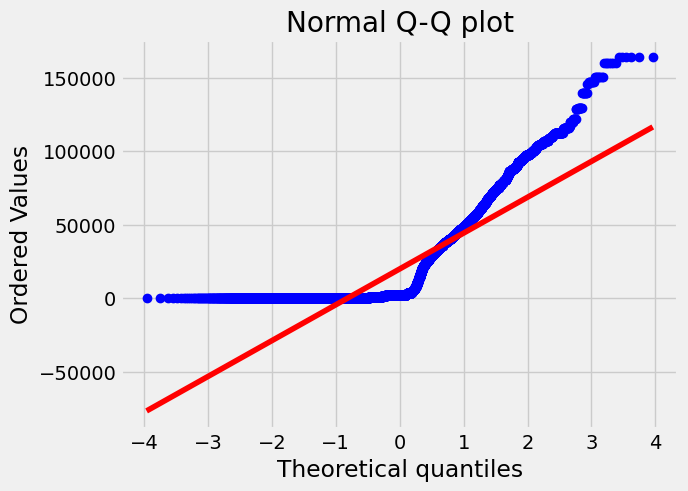

In [ ]:
stats.probplot(df_amostra['subtotal'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df_amostra,  x = "subtotal", nbins=60)
hist.update_layout(width=800,height=500,title_text='Preço unitário')
hist.show()

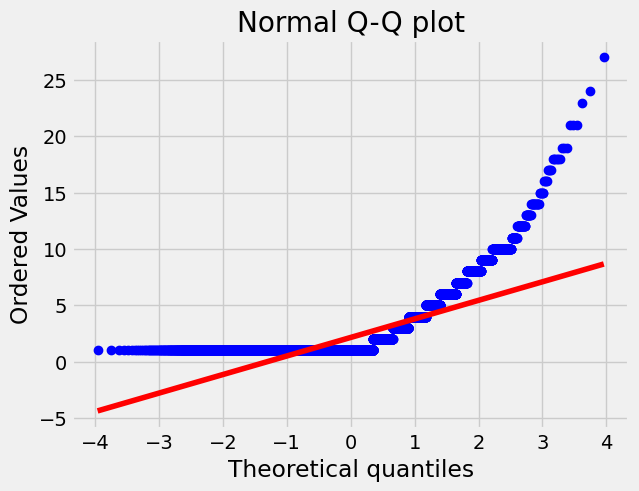

In [ ]:
stats.probplot(df_amostra['order_qty'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df_amostra,  x = "order_qty", nbins=60)
hist.update_layout(width=800,height=500,title_text='Preço unitário')
hist.show()

## Teste Lillieforms
H0 = distribuição normal: p > 0.05

Ha = distribuição != normal: p < 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_amostra.unit_price, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.2930466095203915
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_amostra.subtotal, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.2882633997713795
p-valor: 0.0009999999999998899


In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_amostra.order_qty, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))


Estatística de teste: 0.34574238396687584
p-valor: 0.0009999999999998899


# Correlação Linear

Utilizaremos o Spearman( distribuição não normal)

H0 = não há correlação linear: p > 0,05

Ha = existe correlação linear: p < 0,05

In [ ]:
# Spearman
coef,p = stats.spearmanr(df_amostra.unit_price,df_amostra.order_qty)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.16790378724194735
p-valor: 5.467654702373831e-117


In [ ]:
# Spearman
coef,p = stats.spearmanr(df_amostra.unit_price,df_amostra.subtotal)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.42884631568713333
p-valor: 0.0


In [ ]:
# # Spearman
# coef,p = stats.spearmanr(df_amostra.unit_price,df_amostra.order_qty)
# print('Coeficiente de correlação: {}'.format(coef))
# print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.16790378724194735
p-valor: 5.467654702373831e-117


In [ ]:
# Spearman
coef,p = stats.spearmanr(df_amostra.order_qty, df_amostra.subtotal)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.7220337227709394
p-valor: 0.0


In [ ]:
correlacoes = df_amostra.corr(method='spearman')
correlacoes

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
unit_price,1.000000,0.167904,-0.016453,0.010494,0.428846
order_qty,0.167904,1.000000,0.154844,0.000304,0.722034
unit_price_discount,-0.016453,0.154844,1.000000,-0.001153,0.091401
delivery_days,0.010494,0.000304,-0.001153,1.000000,-0.006387
subtotal,0.428846,0.722034,0.091401,-0.006387,1.000000


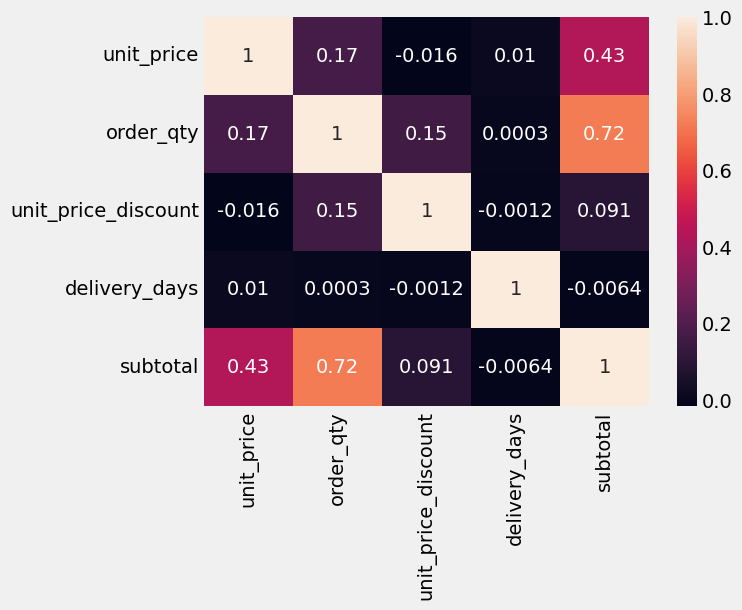

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## Subtotal em função da quantidade comprada

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
x1 = df_amostra.iloc[:,1:2].values
x1

array([[1],
       [1],
       [1],
       ...,
       [3],
       [5],
       [1]])

In [ ]:
y = df_amostra.iloc[:,4].values
y

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

((12943, 1), (12943,))

In [ ]:
x_teste.shape, y_teste.shape

((5547, 1), (5547,))

# Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

3413.692503270777

In [ ]:
# Coeficiente Angular
reg_linear1.coef_

array([7718.62962612])

**Equação: Subtotal = 3413.69 + 7718,63 * Quantidade comprada**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

0.3332298442840326

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

0.3483425379647608

In [ ]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([26569.58138164, 18850.95175552, 18850.95175552, ...,
       11132.32212939, 26569.58138164, 42006.84063389])

In [ ]:
import matplotlib.pyplot as plt

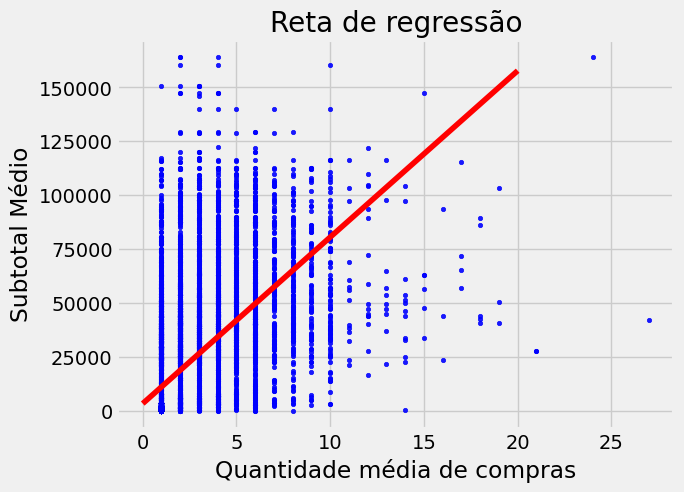

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 20)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Subtotal Médio')
plt.xlabel('Quantidade média de compras')
plt.show()

In [ ]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([18850.95175552, 80599.98876451, 11132.32212939, ...,
       26569.58138164, 11132.32212939, 11132.32212939])

In [ ]:
y_teste

array([ 3793.26,  4718.9 ,   106.93, ..., 94673.14,  2501.31,  2181.56])

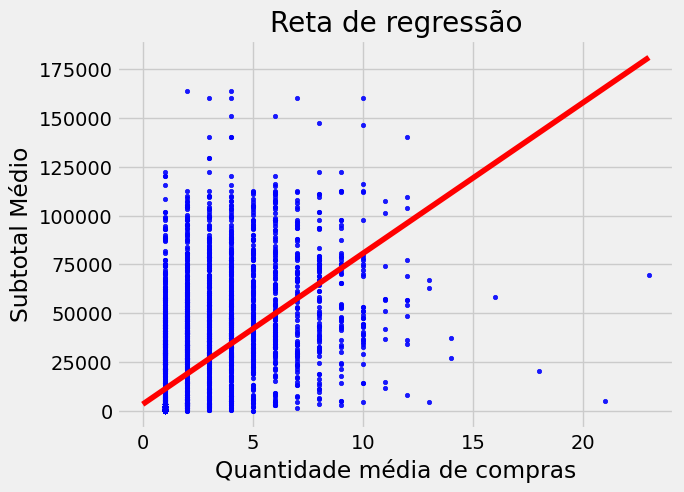

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 23)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Subtotal Médio')
plt.xlabel('Quantidade média de compras')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
qtd_comprada = reg_linear1.predict([[2]])
qtd_comprada

array([18850.95175552])

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

16874.953000651763

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

16874.953000651763

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

533654521.27354157

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

23100.9636438297

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x1, y, cv = kfold)
resultado

array([0.32621355, 0.33754825, 0.36382909, 0.27841218, 0.37575187,
       0.34530976, 0.30541868, 0.39211172, 0.32615152, 0.28349832,
       0.33029759, 0.30930851, 0.39702069, 0.34987174, 0.32907767])

In [ ]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 33.67%


## Avaliando a Regressão Linear Simples com Statsmodels

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
x1 = df_amostra.iloc[:,1:2].values
x1

array([[1],
       [1],
       [1],
       ...,
       [3],
       [5],
       [1]])

In [ ]:
y = df_amostra.iloc[:,4].values
y

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
# Criação do modelo
regressao = smf.ols('y ~ x1', data = df_amostra).fit()

In [ ]:
residuos = regressao.resid
residuos

0       -10315.690086
1       -11013.000086
2        -9842.150086
3       -10491.010086
4       -11010.000086
             ...     
18485   -68561.056333
18486     2678.621321
18487     6859.710852
18488    37141.451790
18489   -11039.990086
Length: 18490, dtype: float64

## Teste de normalidade dos resíduos

H0 = distribuição normal: p > 0.05

Ha = distribuição != normal: p <= 0.05

In [ ]:
from statsmodels.stats.diagnostic import lilliefors

estatistica, p = lilliefors(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.28307765610268665
p-valor: 0.0009999999999998899


In [ ]:
import scipy.stats as stats

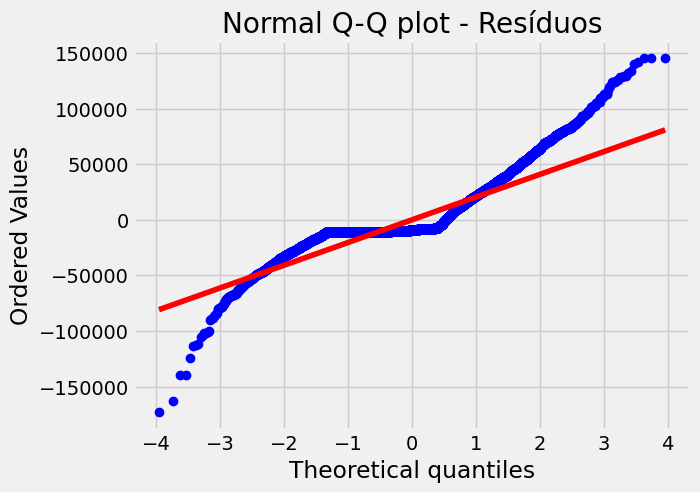

In [ ]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

## Análise da Homocedasticidade dos resíduos

(resíduos com variação constante)

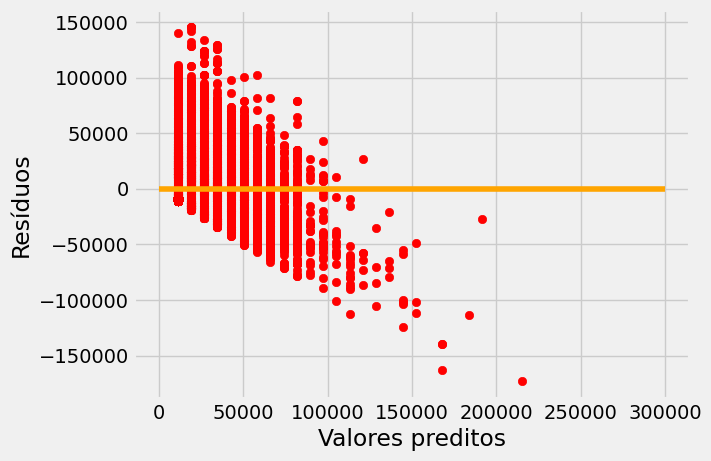

In [ ]:
plt.scatter(y=residuos, x= regressao.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=300000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores preditos')
plt.show()

## Teste Breusch-Pagan(Homocedasticidade ou heterocedasticidade)

H0 = existe homocedasticidade: p > 0.05

Ha = não existe homocedasticidade: p <= 0.05

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan (regressao.resid, regressao.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 1661.0524718691352
p-valor: 0.0
f-valor: 1824.8044358438488
f_p-valor: 0.0


## Outliers nos resíduos

In [ ]:
outliers = regressao.outlier_test()

In [ ]:
outliers.max()

student_resid    6.304796
unadj_p          0.999590
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers.min()

student_resid   -7.541413e+00
unadj_p          4.863907e-14
bonf(p)          8.993365e-10
dtype: float64

**Modelo não consistente**

## Modelo de Regressão Linear

In [ ]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     9439.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:24:06   Log-Likelihood:            -2.1195e+05
No. Observations:               18490   AIC:                         4.239e+05
Df Residuals:                   18488   BIC:                         4.239e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3237.9206    242.135     13.372      0.0

Estatística t:

H0 = coeficiente igual a zero: p > 0.05 (coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0.05 (coeficiente validado)

**R^2 ajustado = 0,338**

In [ ]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

           Coeficientes
Intercept   3237.920556
x1          7842.049531


**Equação: Valor = 3237,92 + 7842,05 * Quantidade comprada**

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
regressao.predict()

array([11079.97008642, 11079.97008642, 11079.97008642, ...,
       26764.06914796, 42448.1682095 , 11079.97008642])

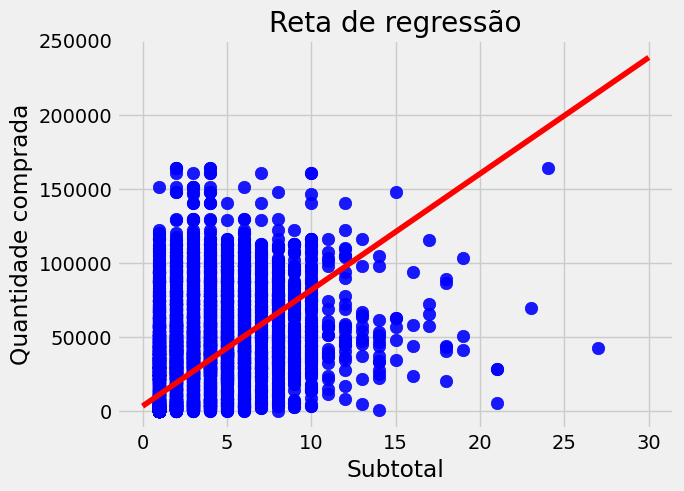

In [ ]:
plt.scatter(y=df_amostra.subtotal,x=df_amostra.order_qty, color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0,30)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Quantidade comprada')
plt.xlabel('Subtotal')
plt.show()

# Regressão com vetores de suporte

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
independente = df_amostra.iloc[:, 0:4].values
independente

array([[742.35,   1.  ,   0.  ,   7.  ],
       [  3.99,   1.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ],
       ...,
       [809.76,   3.  ,   0.  ,   7.  ],
       [ 48.59,   5.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ]])

In [ ]:
independente.shape

(18490, 4)

In [ ]:
dependente = df_amostra.iloc[:,4].values
dependente

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste,  y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((12943, 4), (5547, 4))

In [ ]:
# kernel = rbf, linear, polinominal(poly)
from sklearn.svm import SVR
SVR = SVR(kernel='linear')
SVR.fit(x_treino, y_treino)

SVR(kernel='linear')

In [ ]:
SVR.score(x_treino, y_treino)

0.14560594676772198

In [ ]:
SVR.score(x_teste, y_teste)

0.1592480203474994

In [ ]:
previsores = SVR.predict(x_teste)
previsores

array([ 1203.22093399,   808.43268714,  7044.49047783, ...,
         810.2922901 , 19420.52917007,  7239.86549264])

## Padronização de escala

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [ ]:
x_treino_scaler

array([[-0.5385824 , -0.06526681, -0.06602347, -0.01758246],
       [ 0.47799358, -0.54171823, -0.06602347, -0.01758246],
       [-0.30472207, -0.06526681, -0.06602347, -0.01758246],
       ...,
       [-0.53029235, -0.54171823, -0.06602347, -0.01758246],
       [-0.56533972, -0.54171823, -0.06602347, -0.01758246],
       [-0.56533972, -0.54171823, -0.06602347, -0.01758246]])

In [ ]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [ ]:
y_treino_scaler

array([[ 1.31734311],
       [-0.67974126],
       [ 1.08586728],
       ...,
       [-0.62147634],
       [-0.68690017],
       [-0.66656695]])

In [ ]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[ 0.15043545, -0.54171823, -0.06602347, -0.01758246],
       [-0.53351401, -0.54171823, -0.06602347, -0.01758246],
       [-0.47920407, -0.06526681, -0.06602347, -0.01758246],
       ...,
       [-0.53029235, -0.54171823, -0.06602347, -0.01758246],
       [-0.53703223,  0.88763603, -0.06602347, -0.01758246],
       [-0.14072733, -0.06526681, -0.06602347, -0.01758246]])

In [ ]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-0.68795209],
       [-0.70599023],
       [ 0.126961  ],
       ...,
       [-0.70318077],
       [ 0.54657362],
       [ 0.72830412]])

In [ ]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

# .ravel() é para retornar matriz 1D

SVR()

In [ ]:
SVR2.score(x_treino_scaler, y_treino_scaler)

0.48022488193261503

## Teste

In [ ]:
SVR2.score(x_teste_scaler, y_teste_scaler)

0.48575792629787073

In [ ]:
previsores_teste = SVR2.predict(x_teste_scaler)
previsores_teste

array([-0.57102553, -0.60656098,  0.37047713, ..., -0.60599135,
        0.67533832,  0.49280954])

In [ ]:
y_teste_scaler

array([[-0.68795209],
       [-0.70599023],
       [ 0.126961  ],
       ...,
       [-0.70318077],
       [ 0.54657362],
       [ 0.72830412]])

## Revertendo a transformação

In [ ]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1,1))

In [ ]:
y_teste_inverse

array([[5.489800e+02],
       [3.489000e+01],
       [2.377414e+04],
       ...,
       [1.149600e+02],
       [3.573317e+04],
       [4.091252e+04]])

In [ ]:
previsoes_inverse

array([[5.37275447e+08],
       [2.29713337e+09],
       [3.17293206e+08],
       ...,
       [7.57257688e+08],
       [3.17293206e+08],
       [3.17293206e+08]])

## Métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

569695774.5252761

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse)

5.3364531304894554e+17

In [ ]:
## Raiz do erro quadrático médio(RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

730510310.022347

## Validação Cruzada

### Padronização de escala

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
independente_scaler = X.fit_transform(independente)

In [ ]:
independente_scaler

array([[ 0.42500356, -0.54549732, -0.06002713, -0.01470986],
       [-0.57121909, -0.54549732, -0.06002713, -0.01470986],
       [-0.56986986, -0.54549732, -0.06002713, -0.01470986],
       ...,
       [ 0.51595563,  0.40792412, -0.06002713, -0.01470986],
       [-0.51104312,  1.36134556, -0.06002713, -0.01470986],
       [-0.56986986, -0.54549732, -0.06002713, -0.01470986]])

In [ ]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

array([0.46148091, 0.50577758, 0.45037109, 0.48782347, 0.51532559,
       0.49791776, 0.47668324, 0.50910933, 0.48450857, 0.44967213,
       0.46602005, 0.4382003 , 0.49121199, 0.47584143, 0.46506339])

In [ ]:
# Usamos a média e desvio padrão
print("Coeficiente de Determinação  Médio: %.2f%%" % (resultado.mean() * 100))

Coeficiente de Determinação  Médio: 47.83%


# Regressão com árvore de decisão

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
independente = df_amostra.iloc[:, 0:4].values
independente

array([[742.35,   1.  ,   0.  ,   7.  ],
       [  3.99,   1.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ],
       ...,
       [809.76,   3.  ,   0.  ,   7.  ],
       [ 48.59,   5.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ]])

In [ ]:
independente.shape

(18490, 4)

In [ ]:
dependente = df_amostra.iloc[:,4].values
dependente

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
dependente.shape

(18490,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste,  y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((12943, 4), (5547, 4))

In [ ]:
y_treino.shape, y_teste.shape

((12943,), (5547,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=10, random_state=10)
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=10, random_state=10)

In [ ]:
arvore.score(x_treino, y_treino)

0.6347996111890877

## Teste

In [ ]:
arvore.score(x_teste, y_teste)

0.5770325916477165

In [ ]:
previsoes_teste = arvore.predict(x_teste)
previsores_teste

array([-0.57102553, -0.60656098,  0.37047713, ..., -0.60599135,
        0.67533832,  0.49280954])

In [ ]:
y_teste

array([5.489800e+02, 3.489000e+01, 2.377414e+04, ..., 1.149600e+02,
       3.573317e+04, 4.091252e+04])

## MÉTRICAS

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

10155.588130506889

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

327198362.3337754

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

18088.62521956203

## Validação cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.5328527 , 0.56940555, 0.51510966, 0.52332643, 0.58305558,
       0.55977648, 0.54370405, 0.56942898, 0.56066874, 0.50062273,
       0.53709694, 0.51955281, 0.56376508, 0.52367161, 0.5513073 ])

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação médio: 54.36%


# Regressão com Random Forest

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
independente = df_amostra.iloc[:, 0:4].values
independente

array([[742.35,   1.  ,   0.  ,   7.  ],
       [  3.99,   1.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ],
       ...,
       [809.76,   3.  ,   0.  ,   7.  ],
       [ 48.59,   5.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ]])

In [ ]:
independente.shape

(18490, 4)

In [ ]:
dependente = df_amostra.iloc[:,4].values
dependente

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
dependente.shape

(18490,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste,  y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((12943, 4), (5547, 4))

In [ ]:
y_treino.shape, y_teste.shape

((12943,), (5547,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=11, random_state=10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=11, random_state=10)

In [ ]:
random.score(x_treino, y_treino)

0.6597770303139534

## Teste

In [ ]:
random.score(x_teste, y_teste)

0.6055622373979694

In [ ]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

array([  574.43055507,  2264.5458904 , 40431.26588571, ...,
         875.91588479, 39447.73810806, 31894.51377501])

In [ ]:
y_teste

array([5.489800e+02, 3.489000e+01, 2.377414e+04, ..., 1.149600e+02,
       3.573317e+04, 4.091252e+04])

## Métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

9724.734200744704

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

305128450.6027262

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

17467.926339515125

## Validação cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state=10)

In [ ]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=11, random_state= 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.61268912, 0.58098288, 0.63987219, 0.61292776, 0.60188167,
       0.59920409, 0.60941403, 0.61172157, 0.58928163, 0.60226547,
       0.58265275, 0.6004317 , 0.58531659, 0.59566932, 0.6327864 ])

In [ ]:
# Usamoa a média e o desvio padrão
print("Coeficiente de determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação médio: 60.38%


# Regressão com XGBOOST

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
independente = df_amostra.iloc[:, 0:4].values
independente

array([[742.35,   1.  ,   0.  ,   7.  ],
       [  3.99,   1.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ],
       ...,
       [809.76,   3.  ,   0.  ,   7.  ],
       [ 48.59,   5.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ]])

In [ ]:
independente.shape

(18490, 4)

In [ ]:
dependente = df_amostra.iloc[:,4].values
dependente

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
dependente.shape

(18490,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste,  y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((12943, 4), (5547, 4))

In [ ]:
y_treino.shape, y_teste.shape

((12943,), (5547,))

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost = XGBRegressor(n_estimators=100, max_depth=8, learning_rate = 0.05, Objective="reg:squarederror")
xgboost.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[21:33:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Objective" } are not used.




XGBRegressor(Objective='reg:squarederror', base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
xgboost.score(x_treino, y_treino)

0.6562654236630736

## Teste

In [ ]:
xgboost.score(x_teste, y_teste)

0.6090594245694152

In [ ]:
previsoes_teste = xgboost.predict(x_teste)

## Métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

9755.278332369448

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

17390.316353628947

## Validação cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state=5)

In [ ]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=100, max_depth=8, learning_rate= 0.05, Objective="reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv= kfold)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[21:40:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Objective" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[21:40:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Objective" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[21:40:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Objective" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[21:40:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Objective" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[21:40:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Objective" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[21:40:10] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "Obj

In [ ]:
# Usamoa a média e o desvio padrão
print("Coeficiente de determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação médio: 60.83%


# Regressão com Light GBM

In [ ]:
# Instalação do algoritmo
!pip install lightgbm

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
independente = df_amostra.iloc[:, 0:4].values
independente

array([[742.35,   1.  ,   0.  ,   7.  ],
       [  3.99,   1.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ],
       ...,
       [809.76,   3.  ,   0.  ,   7.  ],
       [ 48.59,   5.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ]])

In [ ]:
independente.shape

(18490, 4)

In [ ]:
dependente = df_amostra.iloc[:,4].values
dependente

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
dependente.shape

(18490,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste,  y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((12943, 4), (5547, 4))

In [ ]:
y_treino.shape, y_teste.shape

((12943,), (5547,))

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves=150, max_depth=10, learning_rate=0.05, n_estimators=80)
lgbm.fit(x_treino, y_treino)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 12943, number of used features: 3
[LightGBM] [Info] Start training from score 20155.730153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMRegressor(learning_rate=0.05, max_depth=10, n_estimators=80, num_leaves=150)

In [ ]:
lgbm.score(x_treino, y_treino)

0.6385027193793928

## Teste

In [ ]:
lgbm.score(x_teste, y_teste)

0.6069395896752987

In [ ]:
previsores_teste = lgbm.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = lgbm.predict([[6,10,0,7]])
valor_casa

array([56308.28012089])

## Métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

9755.278332369448

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

17390.316353628947

## Validação cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state=5)

In [ ]:
# Criando o modelo
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=150, max_depth=10, learning_rate=0.05, n_estimators=80)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 17257, number of used features: 3
[LightGBM] [Info] Start training from score 20080.095546
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

array([0.60738457, 0.63903064, 0.5981073 , 0.57910984, 0.64176797,
       0.63058782, 0.61300081, 0.61257974, 0.62147794, 0.57372841,
       0.59547358, 0.59139799, 0.60806333, 0.58069511, 0.59533187])

In [ ]:
# Usamoa a média e o desvio padrão
print("Coeficiente de determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação médio: 60.58%


# Regressão com Catboost

In [ ]:
!pip install catboost

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
independente = df_amostra.iloc[:, 0:4].values
independente

array([[742.35,   1.  ,   0.  ,   7.  ],
       [  3.99,   1.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ],
       ...,
       [809.76,   3.  ,   0.  ,   7.  ],
       [ 48.59,   5.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ]])

In [ ]:
independente.shape

(18490, 4)

In [ ]:
dependente = df_amostra.iloc[:,4].values
dependente

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
dependente.shape

(18490,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste,  y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((12943, 4), (5547, 4))

In [ ]:
y_treino.shape, y_teste.shape

((12943,), (5547,))

In [ ]:
from catboost.core import CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor (iterations=600, learning_rate=0.05, depth=12, random_state=10)
catboost.fit(x_treino, y_treino)

0:	learn: 27799.3336881	total: 75.6ms	remaining: 45.3s
1:	learn: 27130.8393578	total: 80.1ms	remaining: 24s
2:	learn: 26519.2017891	total: 82.9ms	remaining: 16.5s
3:	learn: 25960.4048403	total: 86.8ms	remaining: 12.9s
4:	learn: 25411.9381011	total: 111ms	remaining: 13.2s
5:	learn: 24921.2364016	total: 129ms	remaining: 12.8s
6:	learn: 24484.5524508	total: 131ms	remaining: 11.1s
7:	learn: 24085.6271378	total: 134ms	remaining: 9.9s
8:	learn: 23716.6155585	total: 136ms	remaining: 8.93s
9:	learn: 23376.0873054	total: 138ms	remaining: 8.14s
10:	learn: 23074.8914890	total: 140ms	remaining: 7.52s
11:	learn: 22769.2152911	total: 161ms	remaining: 7.87s
12:	learn: 22486.6452105	total: 178ms	remaining: 8.04s
13:	learn: 22222.2303561	total: 196ms	remaining: 8.19s
14:	learn: 21989.5439642	total: 202ms	remaining: 7.87s
15:	learn: 21763.3559587	total: 219ms	remaining: 7.99s
16:	learn: 21564.4079664	total: 236ms	remaining: 8.1s
17:	learn: 21389.7902392	total: 239ms	remaining: 7.74s
18:	learn: 21206.618

In [ ]:
catboost.score(x_treino, y_treino)

0.65254760480378

## Teste

In [ ]:
catboost.score(x_teste, y_teste)

0.61105163684623

In [ ]:
previsoes_teste = catboost.predict(x_teste)

## Métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

9824.703615169241

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

17345.949697591826

## Validação Cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state=5)

In [ ]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor( iterations=600, learning_rate=0.05, depth=12, random_state=5)
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
resultado

A saída de streaming foi truncada nas últimas 5000 linhas.
400:	learn: 17082.7599060	total: 9.33s	remaining: 4.63s
401:	learn: 17080.9733429	total: 9.35s	remaining: 4.6s
402:	learn: 17079.3983761	total: 9.37s	remaining: 4.58s
403:	learn: 17077.3336474	total: 9.39s	remaining: 4.55s
404:	learn: 17073.9045329	total: 9.41s	remaining: 4.53s
405:	learn: 17068.7888976	total: 9.43s	remaining: 4.5s
406:	learn: 17067.2478147	total: 9.45s	remaining: 4.48s
407:	learn: 17064.2342553	total: 9.47s	remaining: 4.45s
408:	learn: 17061.3615557	total: 9.48s	remaining: 4.43s
409:	learn: 17059.5767278	total: 9.5s	remaining: 4.4s
410:	learn: 17057.6720641	total: 9.53s	remaining: 4.38s
411:	learn: 17056.1701336	total: 9.54s	remaining: 4.36s
412:	learn: 17053.6013030	total: 9.56s	remaining: 4.33s
413:	learn: 17048.8306883	total: 9.58s	remaining: 4.3s
414:	learn: 17044.8995777	total: 9.61s	remaining: 4.28s
415:	learn: 17043.2578788	total: 9.62s	remaining: 4.26s
416:	learn: 17038.8452656	total: 9.64s	remaining: 

array([0.60890367, 0.64352085, 0.59451306, 0.5836722 , 0.6477277 ,
       0.6288258 , 0.61346719, 0.61723433, 0.63057812, 0.57316067,
       0.59600451, 0.59111383, 0.61411877, 0.57707341, 0.60886957])

In [ ]:
# Usamoa a média e o desvio padrão
print("Coeficiente de determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação médio: 60.86%


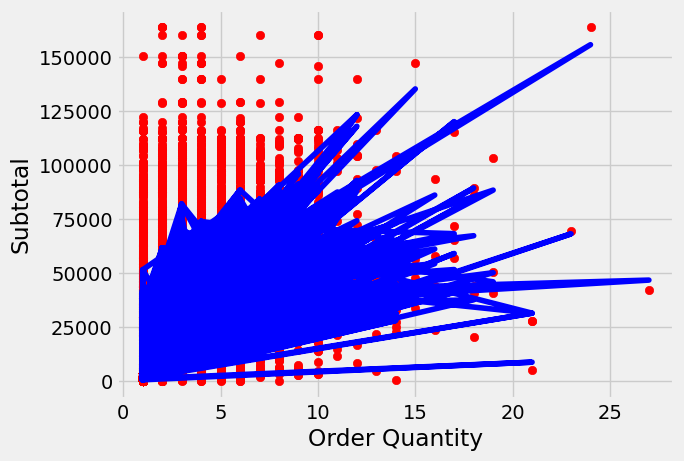

In [ ]:
# Selecionando a segunda coluna da matriz independente
independente_coluna = independente[:, 1]

# Gerando valores previstos para a linha de regressão
valores_previstos = catboost.predict(independente)

# Plotando os valores reais
plt.scatter(independente_coluna, dependente, color = 'red')

# Plotando a linha de regressão
plt.plot(independente_coluna, valores_previstos, color = 'blue')

# Definindo os títulos do gráfico e dos eixos
# plt.title('Regression with Catboost')
plt.xlabel('Order Quantity')
plt.ylabel('Subtotal')

# Mostrando o gráfico
plt.show()


# Regressão com Redes Neurais

In [ ]:
df_amostra.head()

,unit_price,order_qty,unit_price_discount,delivery_days,subtotal
0,742.35,1,0.0,7,764.28
1,3.99,1,0.0,7,66.97
2,4.99,1,0.0,7,1237.82
3,8.99,1,0.0,7,588.96
4,4.99,1,0.0,7,69.97


In [ ]:
independente = df_amostra.iloc[:, 0:4].values
independente

array([[742.35,   1.  ,   0.  ,   7.  ],
       [  3.99,   1.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ],
       ...,
       [809.76,   3.  ,   0.  ,   7.  ],
       [ 48.59,   5.  ,   0.  ,   7.  ],
       [  4.99,   1.  ,   0.  ,   7.  ]])

In [ ]:
independente.shape

(18490, 4)

In [ ]:
dependente = df_amostra.iloc[:,4].values
dependente

array([7.642800e+02, 6.697000e+01, 1.237820e+03, ..., 3.362378e+04,
       7.958962e+04, 3.998000e+01])

In [ ]:
dependente.shape

(18490,)

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste,  y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)

In [ ]:
x_treino.shape, x_teste.shape

((12943, 4), (5547, 4))

In [ ]:
y_treino.shape, y_teste.shape

((12943,), (5547,))

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
redes = MLPRegressor(hidden_layer_sizes=(80,80), activation='relu', verbose=True, max_iter=2000, solver='adam', random_state=12)

In [ ]:
redes.fit(x_treino, y_treino)

Iteration 1, loss = 600774388.25455737
Iteration 2, loss = 564967966.03746521
Iteration 3, loss = 550395693.38902438
Iteration 4, loss = 548152528.50368619
Iteration 5, loss = 545441083.17419040
Iteration 6, loss = 541970052.54640508
Iteration 7, loss = 536970087.61644161
Iteration 8, loss = 530390851.80945301
Iteration 9, loss = 519596250.74486357
Iteration 10, loss = 504209462.74422234
Iteration 11, loss = 482371837.98561066
Iteration 12, loss = 454223237.07657820
Iteration 13, loss = 422382106.34162658
Iteration 14, loss = 390797439.15835476
Iteration 15, loss = 364152472.16753662
Iteration 16, loss = 346381899.46594214
Iteration 17, loss = 335401256.34455752
Iteration 18, loss = 327334579.64962268
Iteration 19, loss = 321470506.25059825
Iteration 20, loss = 315702645.01305240
Iteration 21, loss = 309516426.66200948
Iteration 22, loss = 304136762.82697922
Iteration 23, loss = 298941424.93263090
Iteration 24, loss = 293913890.67222679
Iteration 25, loss = 288686672.82450473
Iteration

MLPRegressor(hidden_layer_sizes=(80, 80), max_iter=2000, random_state=12,
             verbose=True)

In [ ]:
redes.n_layers_

4

In [ ]:
redes.score(x_treino, y_treino)

0.5188216702430533

## Teste

In [ ]:
redes.score(x_teste, y_teste)

0.5191791185959618

In [ ]:
previsoes_teste = redes.predict(x_teste)

## Métricas

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

11935.689771560628

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

19286.071329410377

## Validação Cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 12, shuffle=True, random_state=5)

In [ ]:
# Criando o modelo
from sklearn.neural_network import MLPRegressor
modelo = MLPRegressor(hidden_layer_sizes=(80,80), activation='relu', verbose=True, max_iter=2000, solver='adam', random_state=12)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

Iteration 1, loss = 589295106.32520032
Iteration 2, loss = 547800128.37951434
Iteration 3, loss = 542199093.72175062
Iteration 4, loss = 538765736.76042104
Iteration 5, loss = 533797165.99570227
Iteration 6, loss = 526097695.58335555
Iteration 7, loss = 514066962.02462733
Iteration 8, loss = 494384727.54235715
Iteration 9, loss = 464398457.42683220
Iteration 10, loss = 424895353.13957012
Iteration 11, loss = 384073662.74323761
Iteration 12, loss = 350063569.40863365
Iteration 13, loss = 330334629.59716511
Iteration 14, loss = 318053079.52902269
Iteration 15, loss = 309482536.76638138
Iteration 16, loss = 302075078.29217535
Iteration 17, loss = 294843211.04729146
Iteration 18, loss = 289348620.20969462
Iteration 19, loss = 282124589.83543938
Iteration 20, loss = 275907320.76911128
Iteration 21, loss = 271103075.13156688
Iteration 22, loss = 265850142.33374780
Iteration 23, loss = 260974978.59240198
Iteration 24, loss = 257214651.60863352
Iteration 25, loss = 253493702.83053750
Iteration

array([0.50465499, 0.53775064, 0.49916908, 0.54270196, 0.52360463,
       0.51395389, 0.5354235 , 0.4885794 , 0.50387446, 0.51366256,
       0.50429857, 0.52265764])

In [ ]:
# Usamoa a média e o desvio padrão
print("Coeficiente de determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação médio: 51.59%


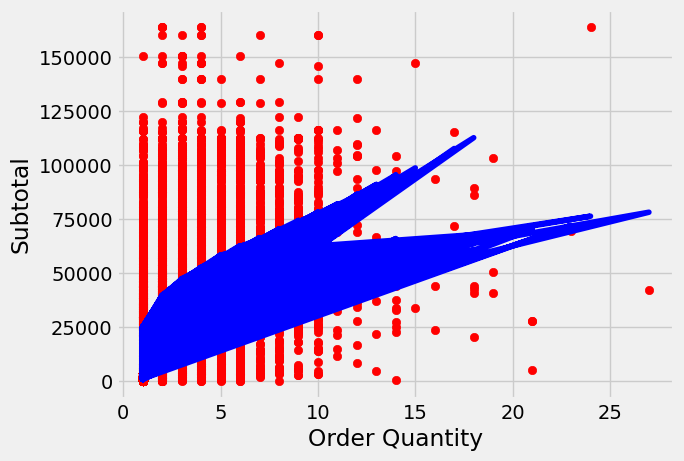

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Selecionando a segunda coluna da matriz independente
independente_coluna = independente[:, 1]

# Gerando valores previstos para a linha de regressão
valores_previstos = redes.predict(independente)

# Plotando os valores reais
plt.scatter(independente_coluna, dependente, color = 'red')

# Plotando a linha de regressão
plt.plot(independente_coluna, valores_previstos, color = 'blue')

# Definindo os títulos do gráfico e dos eixos
# plt.title('Regression with Neural Networks')
plt.xlabel('Order Quantity')
plt.ylabel('Subtotal')

# Mostrando o gráfico
plt.show()


# Resultados

 Regressão Linear Simples = R^2 = 0.33/0.34; RMSE = 23100.96; R^2 Validação Cruzada = 33.67%

 SVR = R^2 = 0.48/0.48; RMSE = 730510310.02; R^2 Validação Cruzada = 47.83%

Árvore de Decisão = R^2= 0.63/0.57; RMSE = 18088.62; R^2 Validação Cruzada =  54.36%

Random Forest = R^2 = 0.65/0.60; RMSE = 17467.92; R^2 Validação Cruzada = 60.38%

XGBoost = R^2 = 0.65/0.60; RMSE = 17390.31; R^2 Validação Cruzada = 60.83%

Light GBM = R^2 = 0.63/0.60; RMSE = 17390.31; R^2 Validação Cruzada = 60.58%

**CatBoost = R^2 = 0.65/0.61; RMSE = 17345.94; R^2 Validação Cruzada = 60.86%**

Redes Neurais = R^2 = 0.51/0.51; RMSE = 19286.07; R^2 Validação Cruzada =  51.59%